In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
df=pd.read_csv("C:/Users/Raj Gupta/OneDrive/Desktop/groceries1.csv")

In [4]:
print(df.head())

   Item(s)            Item 1               Item 2          Item 3  \
0        4      citrus fruit  semi-finished bread       margarine   
1        3    tropical fruit               yogurt          coffee   
2        1        whole milk                  NaN             NaN   
3        4         pip fruit               yogurt    cream cheese   
4        4  other vegetables           whole milk  condensed milk   

                     Item 4 Item 5 Item 6 Item 7 Item 8 Item 9  ... Item 23  \
0               ready soups    NaN    NaN    NaN    NaN    NaN  ...     NaN   
1                       NaN    NaN    NaN    NaN    NaN    NaN  ...     NaN   
2                       NaN    NaN    NaN    NaN    NaN    NaN  ...     NaN   
3              meat spreads    NaN    NaN    NaN    NaN    NaN  ...     NaN   
4  long life bakery product    NaN    NaN    NaN    NaN    NaN  ...     NaN   

  Item 24 Item 25 Item 26 Item 27 Item 28 Item 29 Item 30 Item 31 Item 32  
0     NaN     NaN     NaN     NaN 

In [9]:
num_non_missing_per_transaction = df.iloc[:,1:33].count(axis=1)
num_items_per_transaction = df["Item(s)"]

In [10]:
is_complete_transaction = (num_non_missing_per_transaction == num_items_per_transaction) 

In [11]:
num_rows_with_missing_values = (~is_complete_transaction).sum()

In [12]:
print("Number of Rows with Missing Values (Mismatch in Number of Items):", num_rows_with_missing_values)

Number of Rows with Missing Values (Mismatch in Number of Items): 0


Min 1 Max 32 Number of bins created [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
item_count is 
 Item(s)
1     2159
2     1643
3     1299
4     1005
5      855
6      645
7      545
8      438
9      350
10     246
11     182
12     117
13      78
14      77
15      55
16      46
17      29
19      14
18      14
21      11
20       9
23       6
22       4
29       3
26       1
32       1
27       1
28       1
24       1
Name: count, dtype: int64
total transactions  9835
percentage_item_purchases 
 Item(s)
1     21.952211
2     16.705643
3     13.207931
4     10.218607
5      8.693442
6      6.558210
7      5.541434
8      4.453482
9      3.558719
10     2.501271
11     1.850534
12     1.189629
13     0.793086
14     0.782918
15     0.559227
16     0.467717
17     0.294865
19     0.142349
18     0.142349
21     0.111845
20     0.091510
23     0.061007
22     0.040671
29     0.030503
26     0.010168
32     0.0

Text(0, 3, '17%')

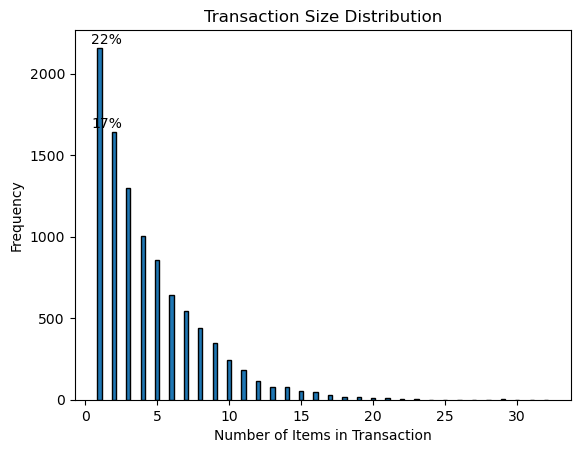

In [22]:
min_size = min(num_items_per_transaction)
max_size = max(num_items_per_transaction)
bins = list(range(min_size,max_size + 2))
print("Min",min_size,"Max",max_size,"Number of bins created",bins)
plt.hist(num_items_per_transaction, bins=bins, edgecolor="black", align="left", rwidth=0.3)
plt.title("Transaction Size Distribution")
plt.xlabel("Number of Items in Transaction")
plt.ylabel("Frequency")
item_count = df["Item(s)"].value_counts()
print("item_count is \n",item_count)
total_transactions = len(df["Item(s)"])
print("total transactions ",total_transactions)
percentage_item_purchases = (item_count / total_transactions) * 100
print("percentage_item_purchases \n",percentage_item_purchases)
height_first_bar = plt.gca().patches[0].get_height()
plt.annotate(f"{round(percentage_item_purchases[1])}%",
             xy=(bins[0] + 0.5, height_first_bar),
             xytext=(0, 3),
             textcoords="offset points",
             ha='center',
             fontsize=10)
height_second_bar = plt.gca().patches[1].get_height()
plt.annotate(f"{round(percentage_item_purchases[2])}%",
             xy=(bins[0] + 0.5, height_second_bar),
             xytext=(0, 3),
             textcoords="offset points",
             ha='center',
             fontsize=10)

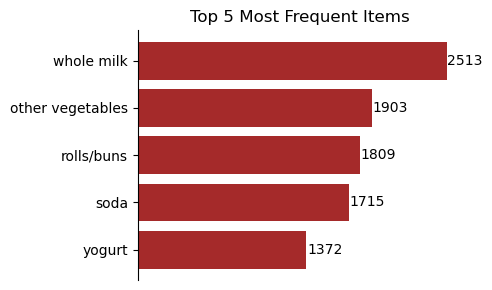

In [23]:
item_counts = df.iloc[:, 1:].stack().value_counts()
sorted_items_desc = item_counts.sort_values(ascending=False)
top_5_items = sorted_items_desc.head(5)
plt.figure(figsize=(5, 3))
bars = plt.barh(range(len(top_5_items)), top_5_items.values, color="brown")
plt.yticks(range(len(top_5_items)), top_5_items.index)
plt.gca().invert_yaxis()
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.tick_params(axis="x", which="both", bottom=False, labelbottom=False)
for index, value in enumerate(top_5_items.values):
    plt.text(value + 5, index, str(value), ha="left", va="center")
plt.grid(False)
plt.ylabel("")
plt.xlabel("")
plt.title("Top 5 Most Frequent Items")
plt.tight_layout()
plt.show()

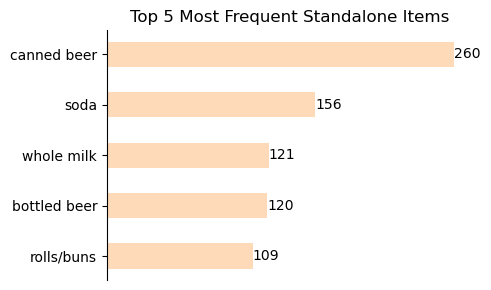

In [24]:
item_columns = df.columns[1:33]
standalone_purchases = df[df["Item(s)"] == 1][item_columns]
standalone_item_counts = standalone_purchases.stack().value_counts()
top_standalone_items = standalone_item_counts.head(5)
plt.figure(figsize=(5, 3))
bar_color = "peachpuff"
plt.barh(top_standalone_items.index, top_standalone_items.values, color=bar_color, height=0.5)
plt.ylabel("")
plt.xlabel("")

plt.title("Top 5 Most Frequent Standalone Items")
for index, value in enumerate(top_standalone_items.values):
    plt.text(value, index, str(value), ha="left", va="center", color="black")
plt.gca().invert_yaxis()
plt.tick_params(axis="x", which="both", bottom=False, labelbottom=False)
plt.grid(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.tight_layout()
plt.show()

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'], ['tropical fruit', 'yogurt', 'coffee'], ['whole milk'], ['pip fruit', 'yogurt', 'cream cheese', 'meat spreads'], ['other vegetables', 'whole milk', 'condensed milk', 'long life bakery product'], ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'], ['rolls/buns'], ['other vegetables', 'UHT-milk', 'rolls/buns', 'bottled beer', 'liquor (appetizer)'], ['potted plants'], ['whole milk', 'cereals'], ['tropical fruit', 'other vegetables', 'white bread', 'bottled water', 'chocolate'], ['citrus fruit', 'tropical fruit', 'whole milk', 'butter', 'curd', 'yogurt', 'flour', 'bottled water', 'dishes'], ['beef'], ['frankfurter', 'rolls/buns', 'soda'], ['chicken', 'tropical fruit'], ['butter', 'sugar', 'fruit/vegetable juice', 'newspapers'], ['fruit/vegetable juice'], ['packaged fruit/vegetables'], ['chocolate'], ['specialty bar'], ['other vegetables'], ['butter milk', 'pastry'], ['whole milk'], ['tropical fruit', 'cream c

      Instant food products  UHT-milk  abrasive cleaner  artif. sweetener  \
0                     False     False             False             False   
1                     False     False             False             False   
2                     False     False             False             False   
3                     False     False             False             False   
4                     False     False             False             False   
...                     ...       ...               ...               ...   
9830                  False     False             False             False   
9831                  False     False             False             False   
9832                  False     False             False             False   
9833                  False     False             False             False   
9834                  False     False             False             False   

      baby cosmetics  baby food   bags  baking powder  bathroom cleaner  \


<Figure size 1000x600 with 0 Axes>

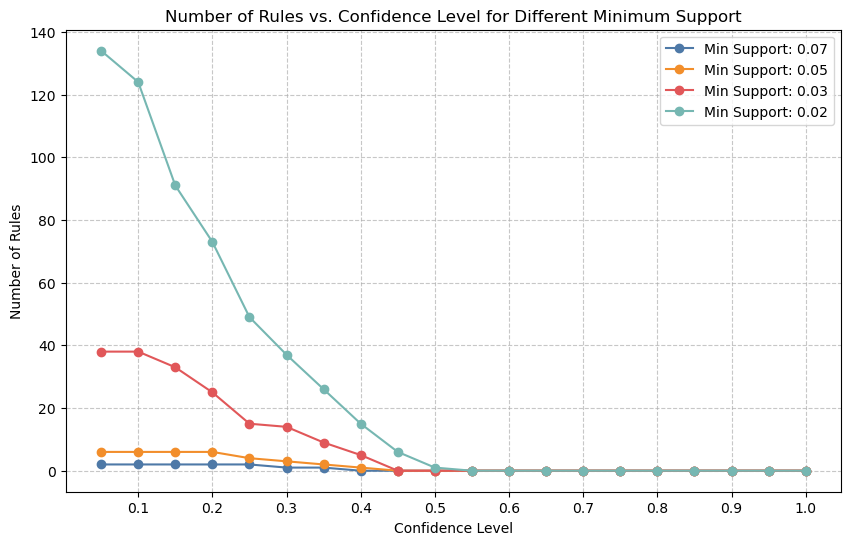

In [25]:
item_columns = df.columns[1:33]
transactions = df[item_columns].apply(lambda row: row.dropna().tolist(), axis=1).tolist()
print(transactions,'trans')
onehot_transactions = pd.DataFrame(transactions)
print('onetran',onehot_transactions)
onehot_encoded = pd.get_dummies(onehot_transactions.unstack()).groupby(level=1).max()
print(onehot_encoded,'onehotencoded')
min_support_values = [0.07, 0.05, 0.03, 0.02]
confidence_levels = list(np.arange(0.05, 1.05, 0.05))
num_rules_lists = []
for min_support in min_support_values:
    frequent_itemsets = apriori(onehot_encoded, min_support=min_support, use_colnames=True)
    rules_list = []
    for confidence_level in confidence_levels:
        rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence_level)
        num_rules = len(rules)
        rules_list.append(num_rules)
    num_rules_lists.append(rules_list)
    print(rules_list,'rl')
    print(num_rules_lists,'nrl')
plt.figure(figsize=(10, 6))
plt.figure(figsize=(10, 6))

colors = ["#4e79a7", "#f28e2b", "#e15759", "#76b7b2"]

for i, min_support in enumerate(min_support_values):
    plt.plot(confidence_levels, num_rules_lists[i], marker="o", color=colors[i], label=f"Min Support: {min_support}")

plt.xlabel("Confidence Level")
plt.ylabel("Number of Rules")
plt.title("Number of Rules vs. Confidence Level for Different Minimum Support")
plt.xticks([0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1])
plt.grid(True, linestyle="--", alpha=0.7)

plt.legend()
plt.show()

In [26]:
frequent_itemsets = apriori(onehot_encoded, min_support=0.03, use_colnames=True)
print('fi',frequent_itemsets)
sorted_frequent_itemsets = frequent_itemsets.sort_values(by="support", ascending=False).reset_index(drop=True)
print('sfi',sorted_frequent_itemsets)
sorted_frequent_itemsets["length"] = sorted_frequent_itemsets["itemsets"].apply(len)
with pd.option_context("display.max_rows", None,
                       "display.max_columns", None,
                       "display.precision", 3,
                       ):
  print(sorted_frequent_itemsets)

fi      support                          itemsets
0   0.033452                        (UHT-milk)
1   0.052466                            (beef)
2   0.033249                         (berries)
3   0.080529                    (bottled beer)
4   0.110524                   (bottled water)
..       ...                               ...
58  0.048907     (whole milk, root vegetables)
59  0.040061                (whole milk, soda)
60  0.042298      (whole milk, tropical fruit)
61  0.032232  (whipped/sour cream, whole milk)
62  0.056024              (whole milk, yogurt)

[63 rows x 2 columns]
sfi      support                    itemsets
0   0.255516                (whole milk)
1   0.193493          (other vegetables)
2   0.183935                (rolls/buns)
3   0.174377                      (soda)
4   0.139502                    (yogurt)
..       ...                         ...
58  0.031012                    (onions)
59  0.030605       (rolls/buns, sausage)
60  0.030503  (whole milk, citrus fru

In [28]:
association_rules_df = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)
sorted_association_rules = association_rules_df.sort_values(by="lift", ascending=False).reset_index(drop=True)
print("\nAssociation Rules:")
print(sorted_association_rules)
sorted_association_rules.to_csv("C:/Users/Raj Gupta/OneDrive/Desktop/groceries1.csv")


Association Rules:
             antecedents         consequents  antecedent support  \
0      (root vegetables)  (other vegetables)            0.108998   
1              (sausage)        (rolls/buns)            0.093950   
2       (tropical fruit)  (other vegetables)            0.104931   
3   (whipped/sour cream)        (whole milk)            0.071683   
4      (root vegetables)        (whole milk)            0.108998   
5               (yogurt)  (other vegetables)            0.139502   
6       (tropical fruit)        (whole milk)            0.104931   
7               (yogurt)        (whole milk)            0.139502   
8            (pip fruit)        (whole milk)            0.075648   
9     (other vegetables)        (whole milk)            0.193493   
10              (pastry)        (whole milk)            0.088968   
11        (citrus fruit)        (whole milk)            0.082766   
12       (bottled water)        (whole milk)            0.110524   
13          (rolls/buns)    